In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
Y = y_train.reshape(-1,)
Y[:4]

array([6, 9, 9, 4], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


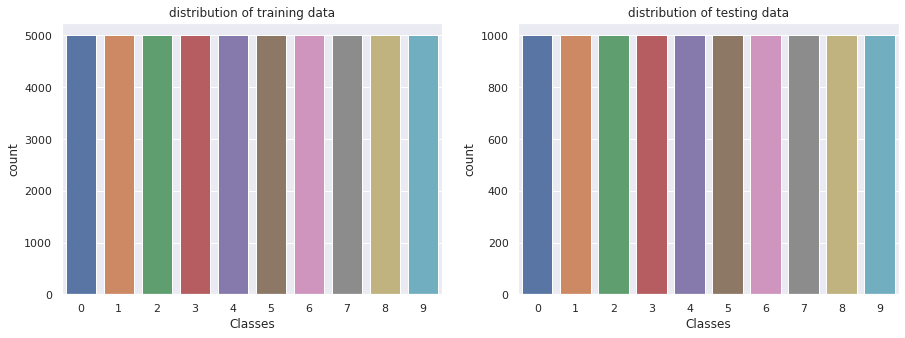

In [7]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

sns.countplot(y_train.ravel(), ax = axs[0])
axs[0].set_title("distribution of training data")
axs[0].set_xlabel("Classes")

sns.countplot(y_test.ravel(), ax = axs[1])
axs[1].set_title("distribution of testing data")
axs[1].set_xlabel("Classes")

plt.show()

In [8]:
labels = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [9]:
def plot_sample(X,y,Y,index):
  plt.figure(figsize=(15,3))
  plt.imshow(X[index])
  plt.xlabel(labels[Y[index]])

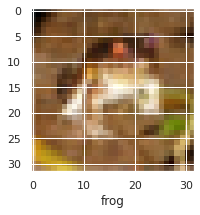

In [10]:
plot_sample(X_train,y_train,Y,0)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


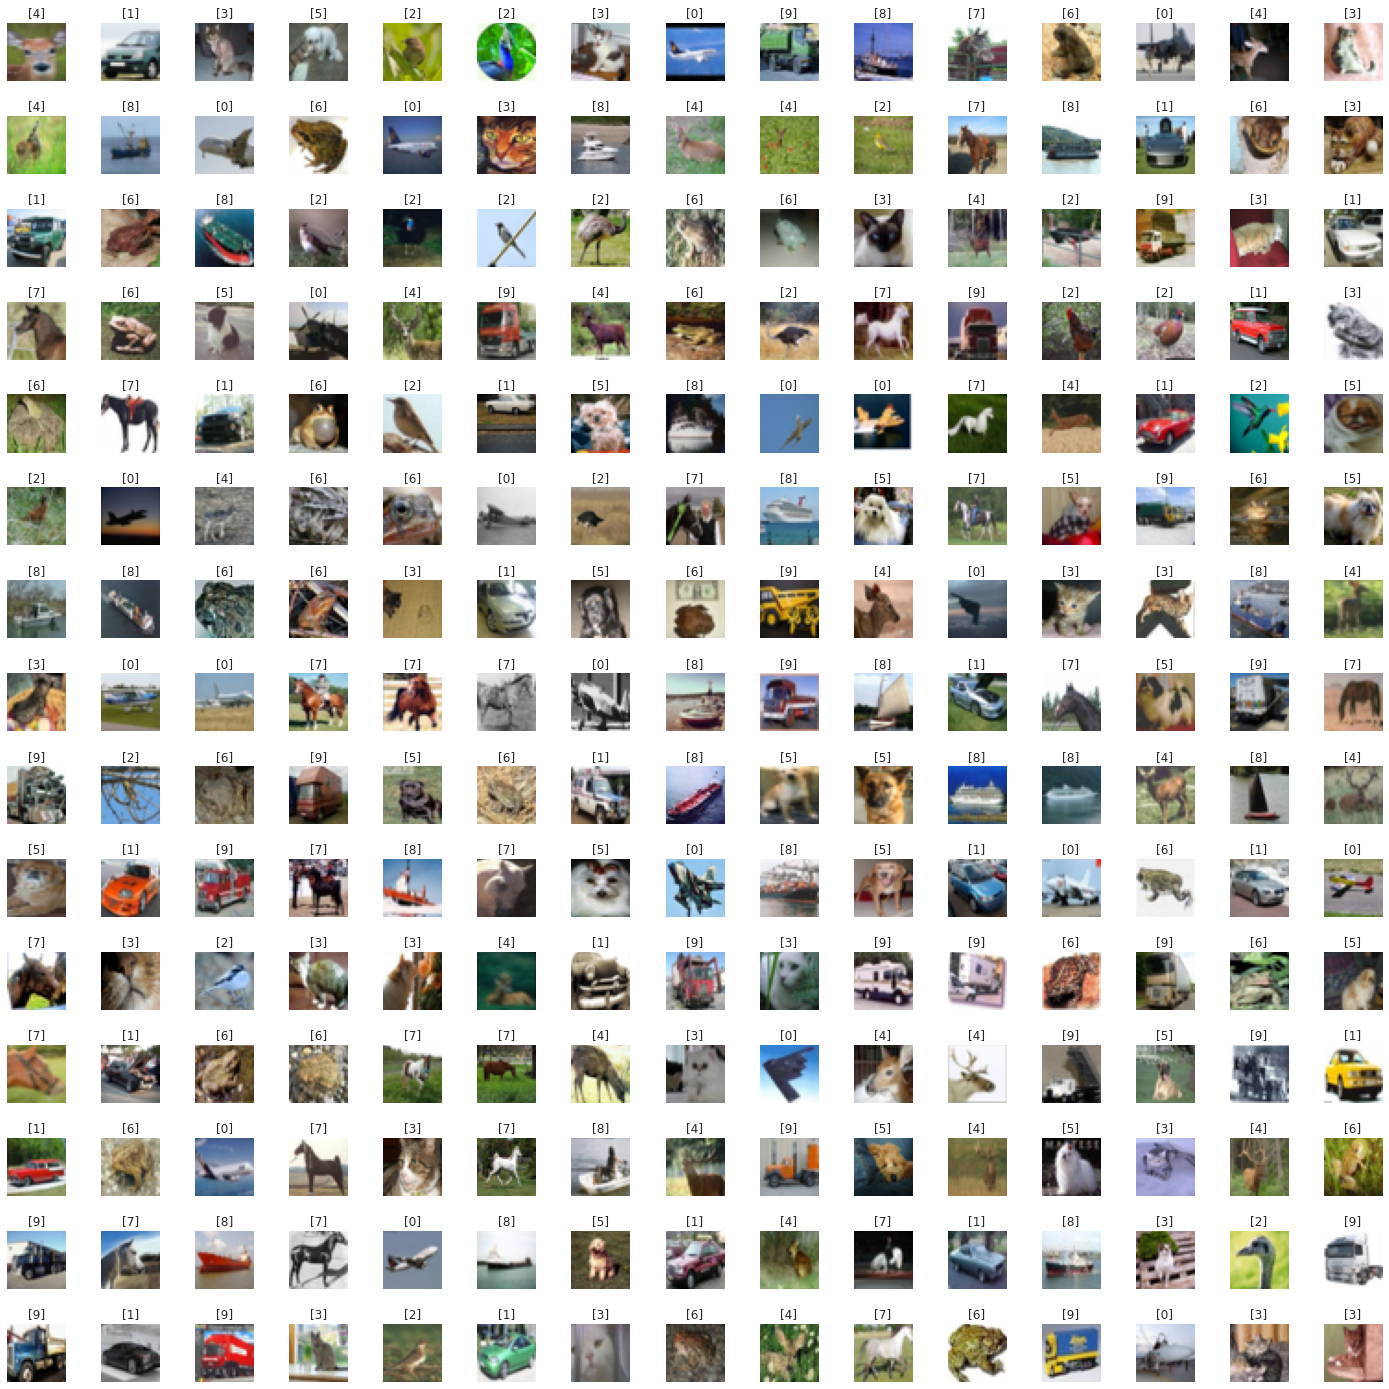

In [11]:
l_grid,w_grid=15,15

fig,axes=plt.subplots(l_grid,w_grid,figsize=(25,25))

axes=axes.ravel() #used to flatten the image into 25*25
n_training=len(X_train)
for i in np.arange(0,l_grid*w_grid):
  index=np.random.randint(0,n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.6)

In [12]:
X_train = X_train.reshape(X_train.shape[0], 32*32*3)
X_test = X_test.reshape(X_test.shape[0],32*32*3)

In [13]:
print(X_train.shape)

(50000, 3072)


logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
clf = LogisticRegression(penalty='none', 
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
clf.coef_.shape

(10, 3072)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.4062


random forest

In [25]:
#using random forest classifier(Decision tree as a base classifer)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)

rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)
pred = rf_clf.predict(X_test)
pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


array([2, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [26]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.3565
